In [1]:
import os
import pandas as pd
from glob import glob
from tqdm import tqdm

# Path where all your RNA-Seq folders are located
base_dir = r'C:\Users\shrav\Desktop\PYTHON\GDC_Ovarian_Data'  # change this to your actual path

# Find all .tsv files inside those folders
tsv_files = glob(os.path.join(base_dir, '*', '*.tsv'))

# Initialize empty list to collect dataframes
merged_data = []

# Track sample IDs
sample_ids = []

# Iterate over each file
for filepath in tqdm(tsv_files):
    try:
        df = pd.read_csv(filepath, sep='\t', comment='#')

        # Check for gene_id column
        if 'gene_id' in df.columns:
            df = df[['gene_id', 'tpm_unstranded']]  # or use 'fpkm_unstranded'
            df.columns = ['gene_id', os.path.basename(os.path.dirname(filepath))]
            merged_data.append(df.set_index('gene_id'))
            sample_ids.append(os.path.basename(os.path.dirname(filepath)))
    except Exception as e:
        print(f"Error processing {filepath}: {e}")

# Concatenate all dataframes
final_df = pd.concat(merged_data, axis=1)

# Save to file
final_df.to_csv("TCGA_Merged_RNASeq_TPM_Matrix.csv")

print("✅ Successfully merged and saved as TCGA_Merged_RNASeq_TPM_Matrix.csv")


100%|██████████| 530/530 [00:38<00:00, 13.62it/s]


✅ Successfully merged and saved as TCGA_Merged_RNASeq_TPM_Matrix.csv


In [2]:
import pandas as pd

# Load the raw file
file_path = "C:/Users/shrav/Desktop/PYTHON/GDC_Ovarian_Data/TCGA_Merged_RNASeq_TPM_Matrix.csv"
df = pd.read_csv(file_path)

# Drop rows like N_unmapped, N_noFeature, etc.
df = df[~df['gene_id'].str.startswith('N_')]

# Set gene_id as index
df.set_index('gene_id', inplace=True)

# Convert all remaining data to numeric (force invalid entries to NaN)
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows or columns with too many missing values (optional)
df.dropna(axis=0, how='any', inplace=True)  # Drop genes with missing values
# df.dropna(axis=1, how='any', inplace=True)  # Optional: Drop samples with missing values

# Save cleaned file
cleaned_path = "C:/Users/shrav/Desktop/PYTHON/GDC_Ovarian_Data/Cleaned_TPM_Matrix.csv"
df.to_csv(cleaned_path)

print(f"✅ Cleaned TPM matrix saved to: {cleaned_path}")


✅ Cleaned TPM matrix saved to: C:/Users/shrav/Desktop/PYTHON/GDC_Ovarian_Data/Cleaned_TPM_Matrix.csv


In [4]:
import pandas as pd

# Load your data
file_path = "C:/Users/shrav/Desktop/PYTHON/GDC_Ovarian_Data/TCGA_Merged_RNASeq_TPM_Matrix.csv"
df = pd.read_csv(file_path)

# Step 1: Drop the rows that aren't gene expression (first 4 rows)
df = df[~df['gene_id'].isin(['N_unmapped', 'N_multimapping', 'N_noFeature', 'N_ambiguous'])]

# Step 2: Replace all NaN with 0
df_filled = df.fillna(0)

# Step 3: Optional – reset index
df_filled.reset_index(drop=True, inplace=True)

# Step 4: Preview the cleaned data
print("✅ Cleaned Data Preview:")
print(df_filled.head())

# Step 5: Save cleaned version (optional)
df_filled.to_csv("C:/Users/shrav/Desktop/PYTHON/GDC_Ovarian_Data/Cleaned_TPM.csv", index=False)


✅ Cleaned Data Preview:
              gene_id  0058f6ab-2114-4ead-af5e-ba002b5f9cc2  \
0  ENSG00000000003.15                               67.5965   
1   ENSG00000000005.6                                0.0000   
2  ENSG00000000419.13                               94.3663   
3  ENSG00000000457.14                                5.0032   
4  ENSG00000000460.17                                3.7855   

   006d3450-dab8-487d-a2f2-50fdd64c0a6b  00dc8820-694b-47a2-9410-09971711cbee  \
0                               58.9111                               37.6449   
1                                0.4309                                0.0000   
2                              202.4228                               69.4249   
3                                3.1417                                4.7378   
4                                1.7291                                3.5015   

   016a2336-115d-4542-82ce-f5b4d5e08805  0181581f-6649-40a3-892b-2be54bbbf715  \
0                            

In [5]:
import pandas as pd

# Load your cleaned data
file_path = r"C:\Users\shrav\Desktop\PYTHON\GDC_Ovarian_Data\Cleaned_TPM.csv"
df = pd.read_csv(file_path)

# Set gene_id as the row index
df.set_index("gene_id", inplace=True)

# Save to new CSV
output_path = r"C:\Users\shrav\Desktop\PYTHON\GDC_Ovarian_Data\final_expression_matrix.csv"
df.to_csv(output_path)

print("✅ Done! File saved as:", output_path)


✅ Done! File saved as: C:\Users\shrav\Desktop\PYTHON\GDC_Ovarian_Data\final_expression_matrix.csv


In [11]:
import pandas as pd

# Load the deconvoluted result
xcell_df = pd.read_csv("xcell_deconvolution_output.csv", index_col=0)
# Check the structure
print(xcell_df.shape)
print(xcell_df.head())


(39, 530)
                                  0058f6ab-2114-4ead-af5e-ba002b5f9cc2  \
cell_type                                                                
Myeloid dendritic cell activated                          2.437713e-01   
B cell                                                    1.683232e-02   
T cell CD4+ memory                                        0.000000e+00   
T cell CD4+ naive                                         6.639004e-18   
T cell CD4+ (non-regulatory)                              0.000000e+00   

                                  006d3450-dab8-487d-a2f2-50fdd64c0a6b  \
cell_type                                                                
Myeloid dendritic cell activated                          1.945639e-01   
B cell                                                    1.052420e-19   
T cell CD4+ memory                                        2.821151e-20   
T cell CD4+ naive                                         2.158795e-17   
T cell CD4+ (non-regulatory

In [16]:
import pandas as pd

# Load your xCell deconvolution results
df = pd.read_csv("xcell_deconvoluted_cleaned.csv", index_col=0)
df.head()
# Transpose to get samples as rows and cell types as columns
df = df.T

# Optional: Clean column names
df.columns = df.columns.str.strip()
df.index.name = "Sample"

df.head()



cell_type,Myeloid dendritic cell activated,B cell,T cell CD4+ memory,T cell CD4+ naive,T cell CD4+ (non-regulatory),T cell CD4+ central memory,T cell CD4+ effector memory,T cell CD8+ naive,T cell CD8+,T cell CD8+ central memory,...,T cell NK,Plasmacytoid dendritic cell,B cell plasma,T cell gamma delta,T cell CD4+ Th1,T cell CD4+ Th2,T cell regulatory (Tregs),immune score,stroma score,microenvironment score
Sample,,,,,,,,,,,,,,,,,,,,,
Sample_1,0.243771,1.683232e-02,0.000000e+00,6.639004e-18,0.000000e+00,1.764970e-18,4.668330e-19,0.005194,3.921321e-18,8.482057e-03,...,0.127298,0.006340,5.132078e-02,3.980184e-18,0.428838,0.070761,3.898766e-18,3.565806e-02,0.088639,0.124298
Sample_2,0.194564,1.052420e-19,2.821151e-20,2.158795e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.010336,1.433990e-17,0.000000e+00,...,0.154869,0.000000,3.954923e-02,8.510684e-18,0.533071,0.000000,0.000000e+00,1.333852e-17,0.124007,0.124007
Sample_3,0.598258,2.014588e-01,2.762207e-04,1.211924e-19,0.000000e+00,1.054309e-02,8.679013e-02,0.002266,2.602209e-02,7.884075e-02,...,0.104772,0.037360,1.023230e-01,0.000000e+00,0.415968,0.000000,0.000000e+00,3.113495e-01,0.120576,0.431926
Sample_4,0.284655,1.582568e-02,1.806076e-02,0.000000e+00,0.000000e+00,1.421769e-17,4.241353e-03,0.018537,0.000000e+00,2.435270e-02,...,0.000150,0.016745,9.307925e-03,1.064818e-17,0.257027,0.166045,0.000000e+00,1.249179e-01,0.072268,0.197186
Sample_5,0.290589,0.000000e+00,2.945841e-19,0.000000e+00,1.397943e-18,2.820883e-18,5.290737e-18,0.000142,6.131417e-18,1.207841e-18,...,0.176592,0.000000,4.380574e-19,0.000000e+00,0.416344,0.146815,0.000000e+00,4.635173e-02,0.055868,0.102219


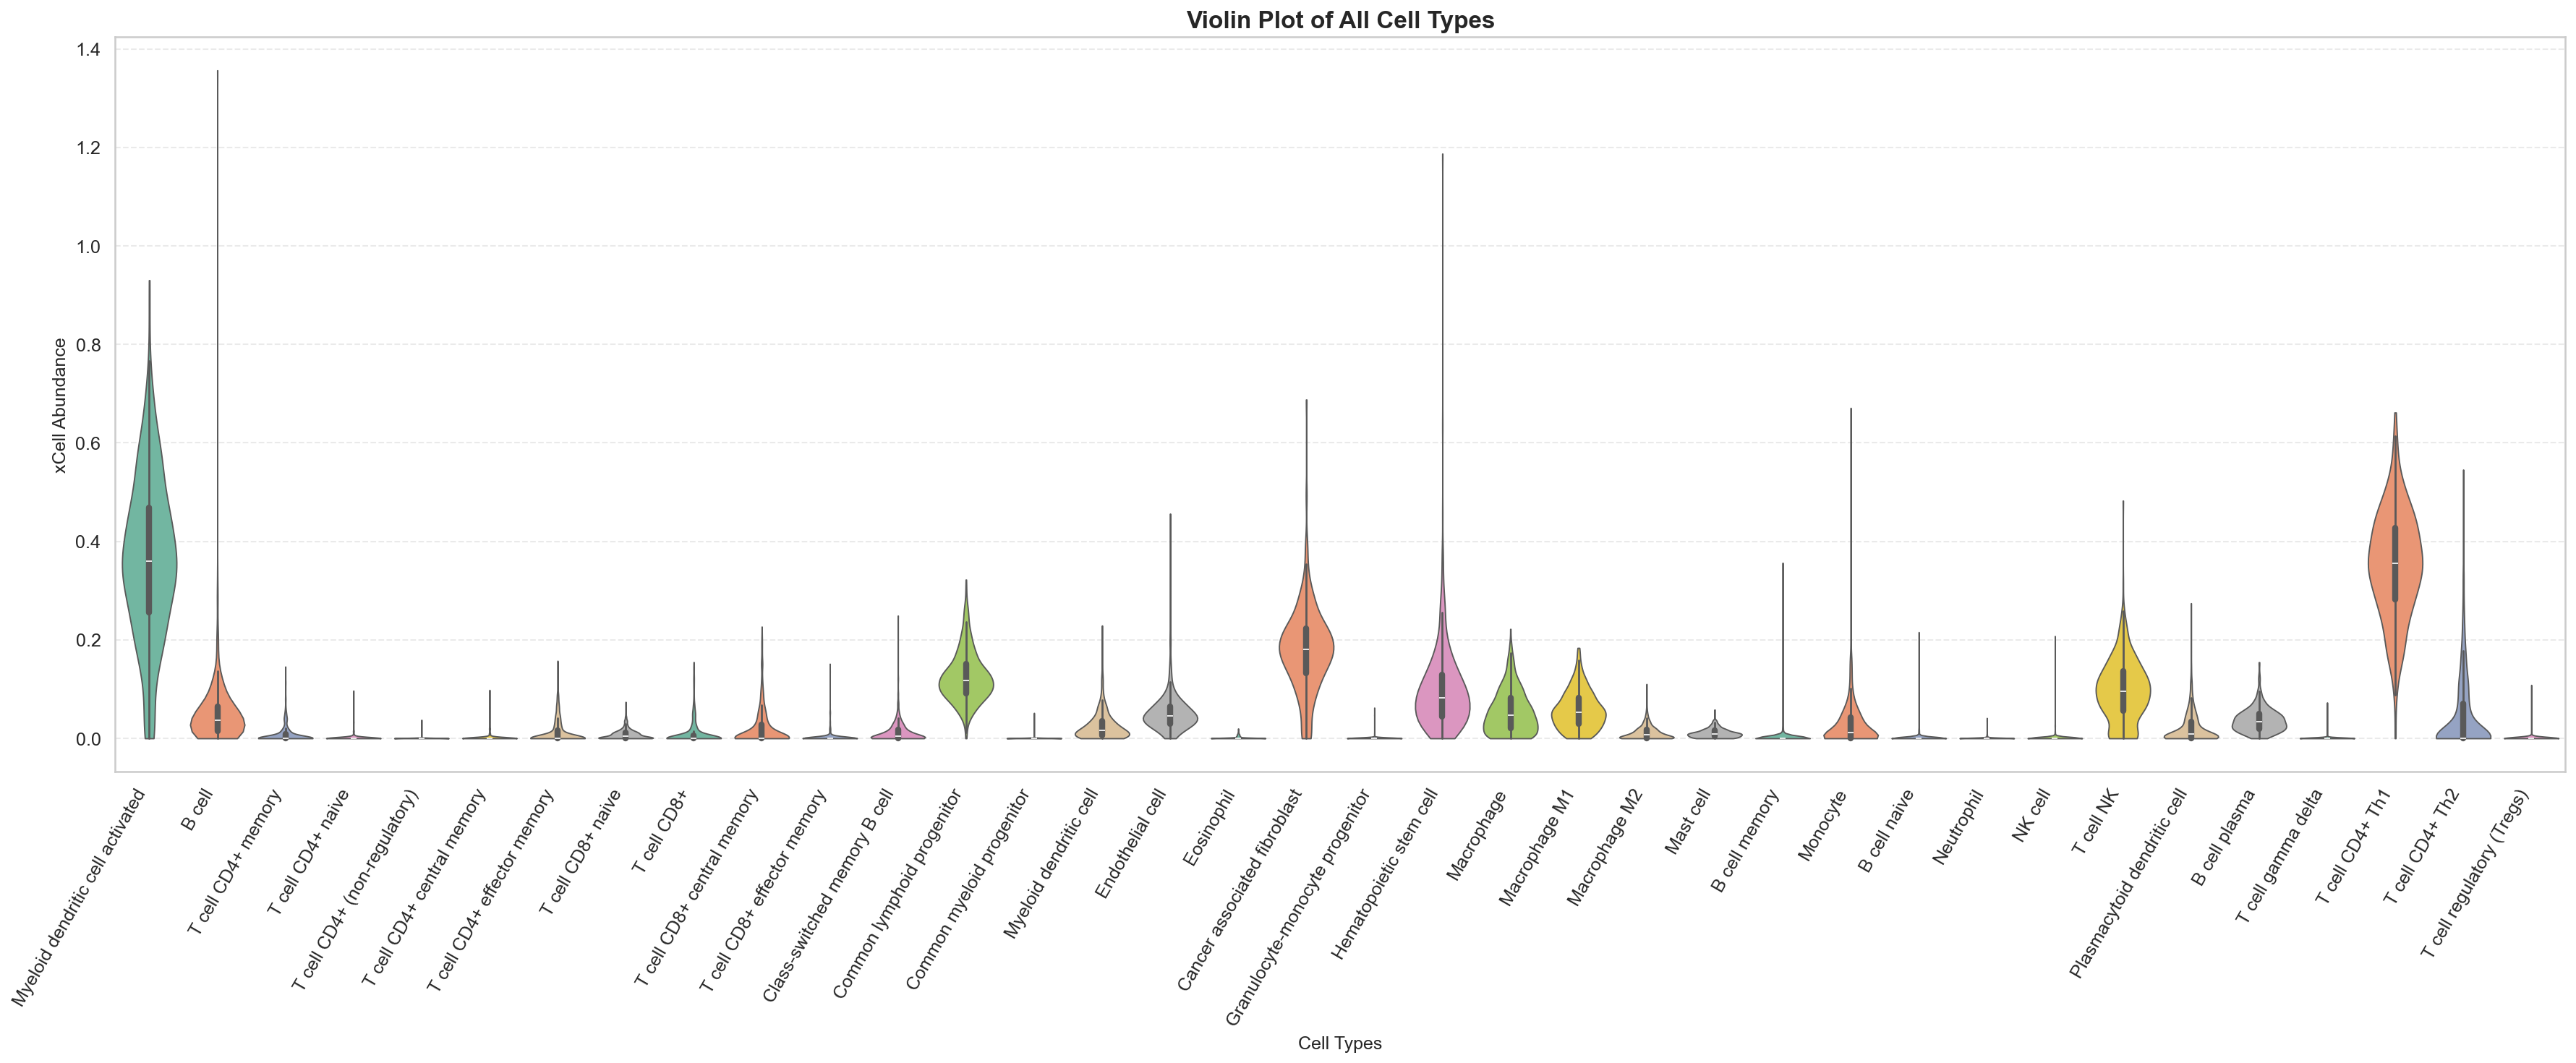

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude last 3 cell types
df_trimmed = df.iloc[:, :-3]

# Set seaborn style
sns.set(style="whitegrid", font_scale=1.1, rc={"figure.dpi": 150})

# Create larger and taller figure
plt.figure(figsize=(24, 10))

# Plot
sns.violinplot(data=df_trimmed, palette="Set2", linewidth=0.9, cut=0)

# Labels & formatting
plt.title("Violin Plot of All Cell Types", fontsize=16, weight='bold')
plt.xticks(rotation=60, ha='right')
plt.ylabel("xCell Abundance", fontsize=12)
plt.xlabel("Cell Types", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


C:\Users\shrav\AppData\Local\Temp\ipykernel_5332\2137662346.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x="Cell Type", y="Abundance", palette="Set3")


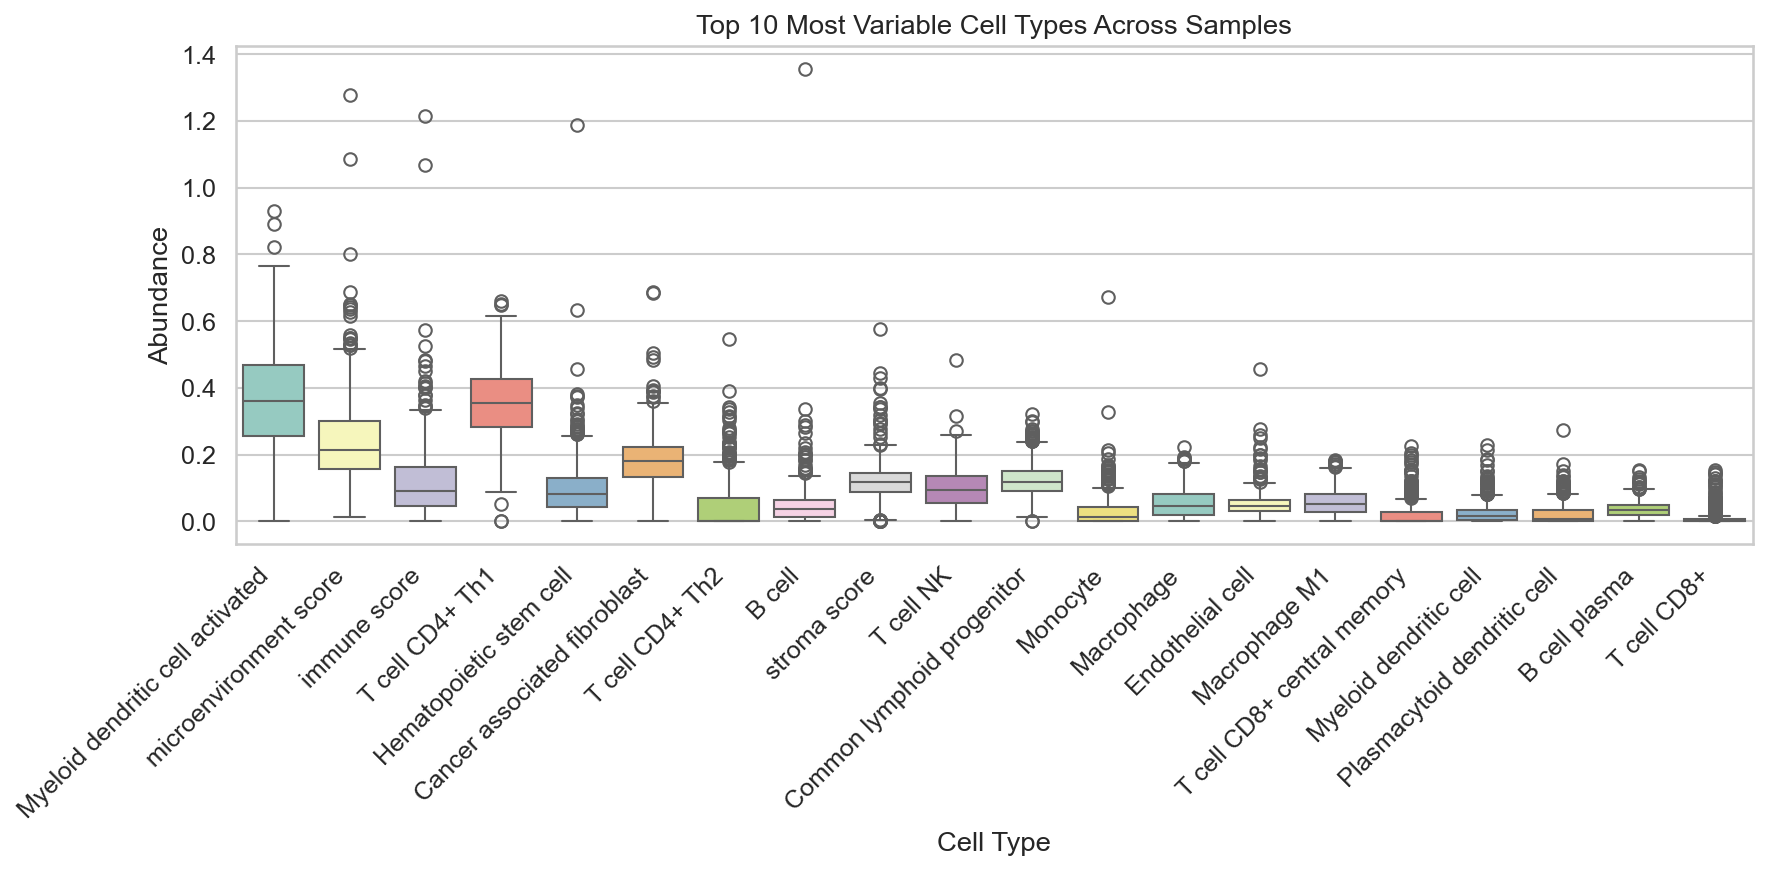

In [26]:
top_var = df.var().sort_values(ascending=False).head(20).index
df_top = df[top_var].melt(var_name="Cell Type", value_name="Abundance")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x="Cell Type", y="Abundance", palette="Set3")
plt.title("Top 10 Most Variable Cell Types Across Samples")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


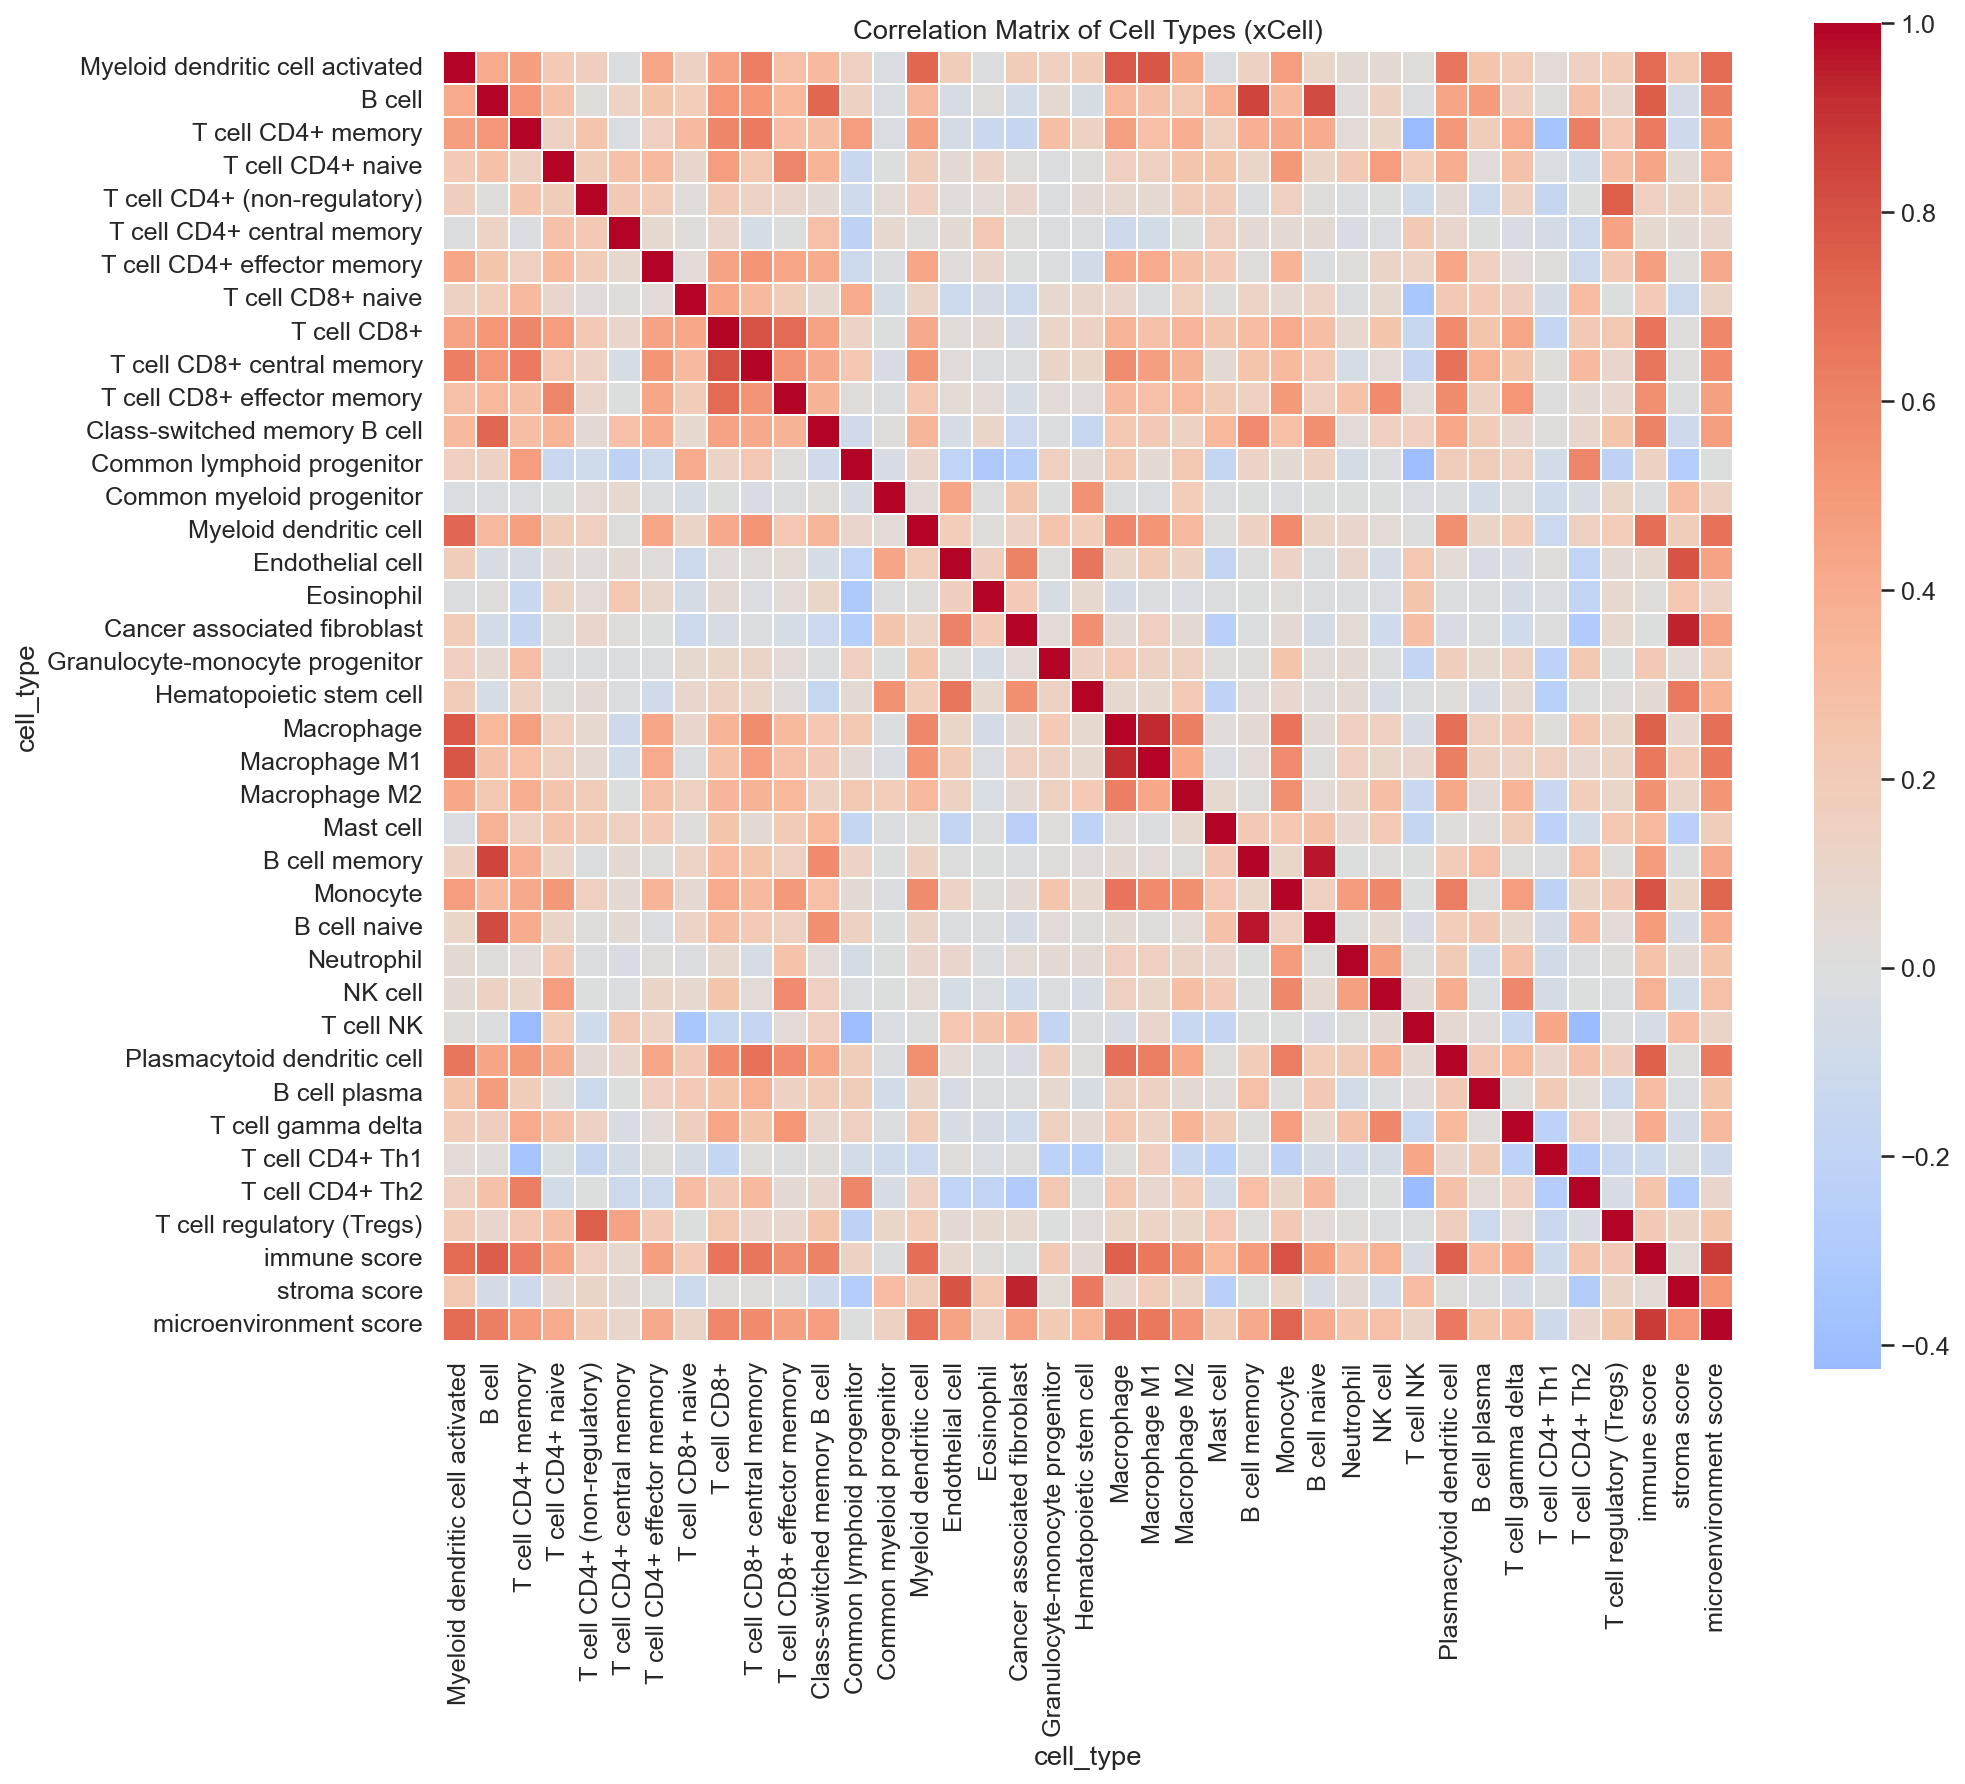

In [27]:
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), cmap="coolwarm", center=0, square=True, linewidths=0.2)
plt.title("Correlation Matrix of Cell Types (xCell)")
plt.tight_layout()
plt.show()


C:\Users\shrav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\shrav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


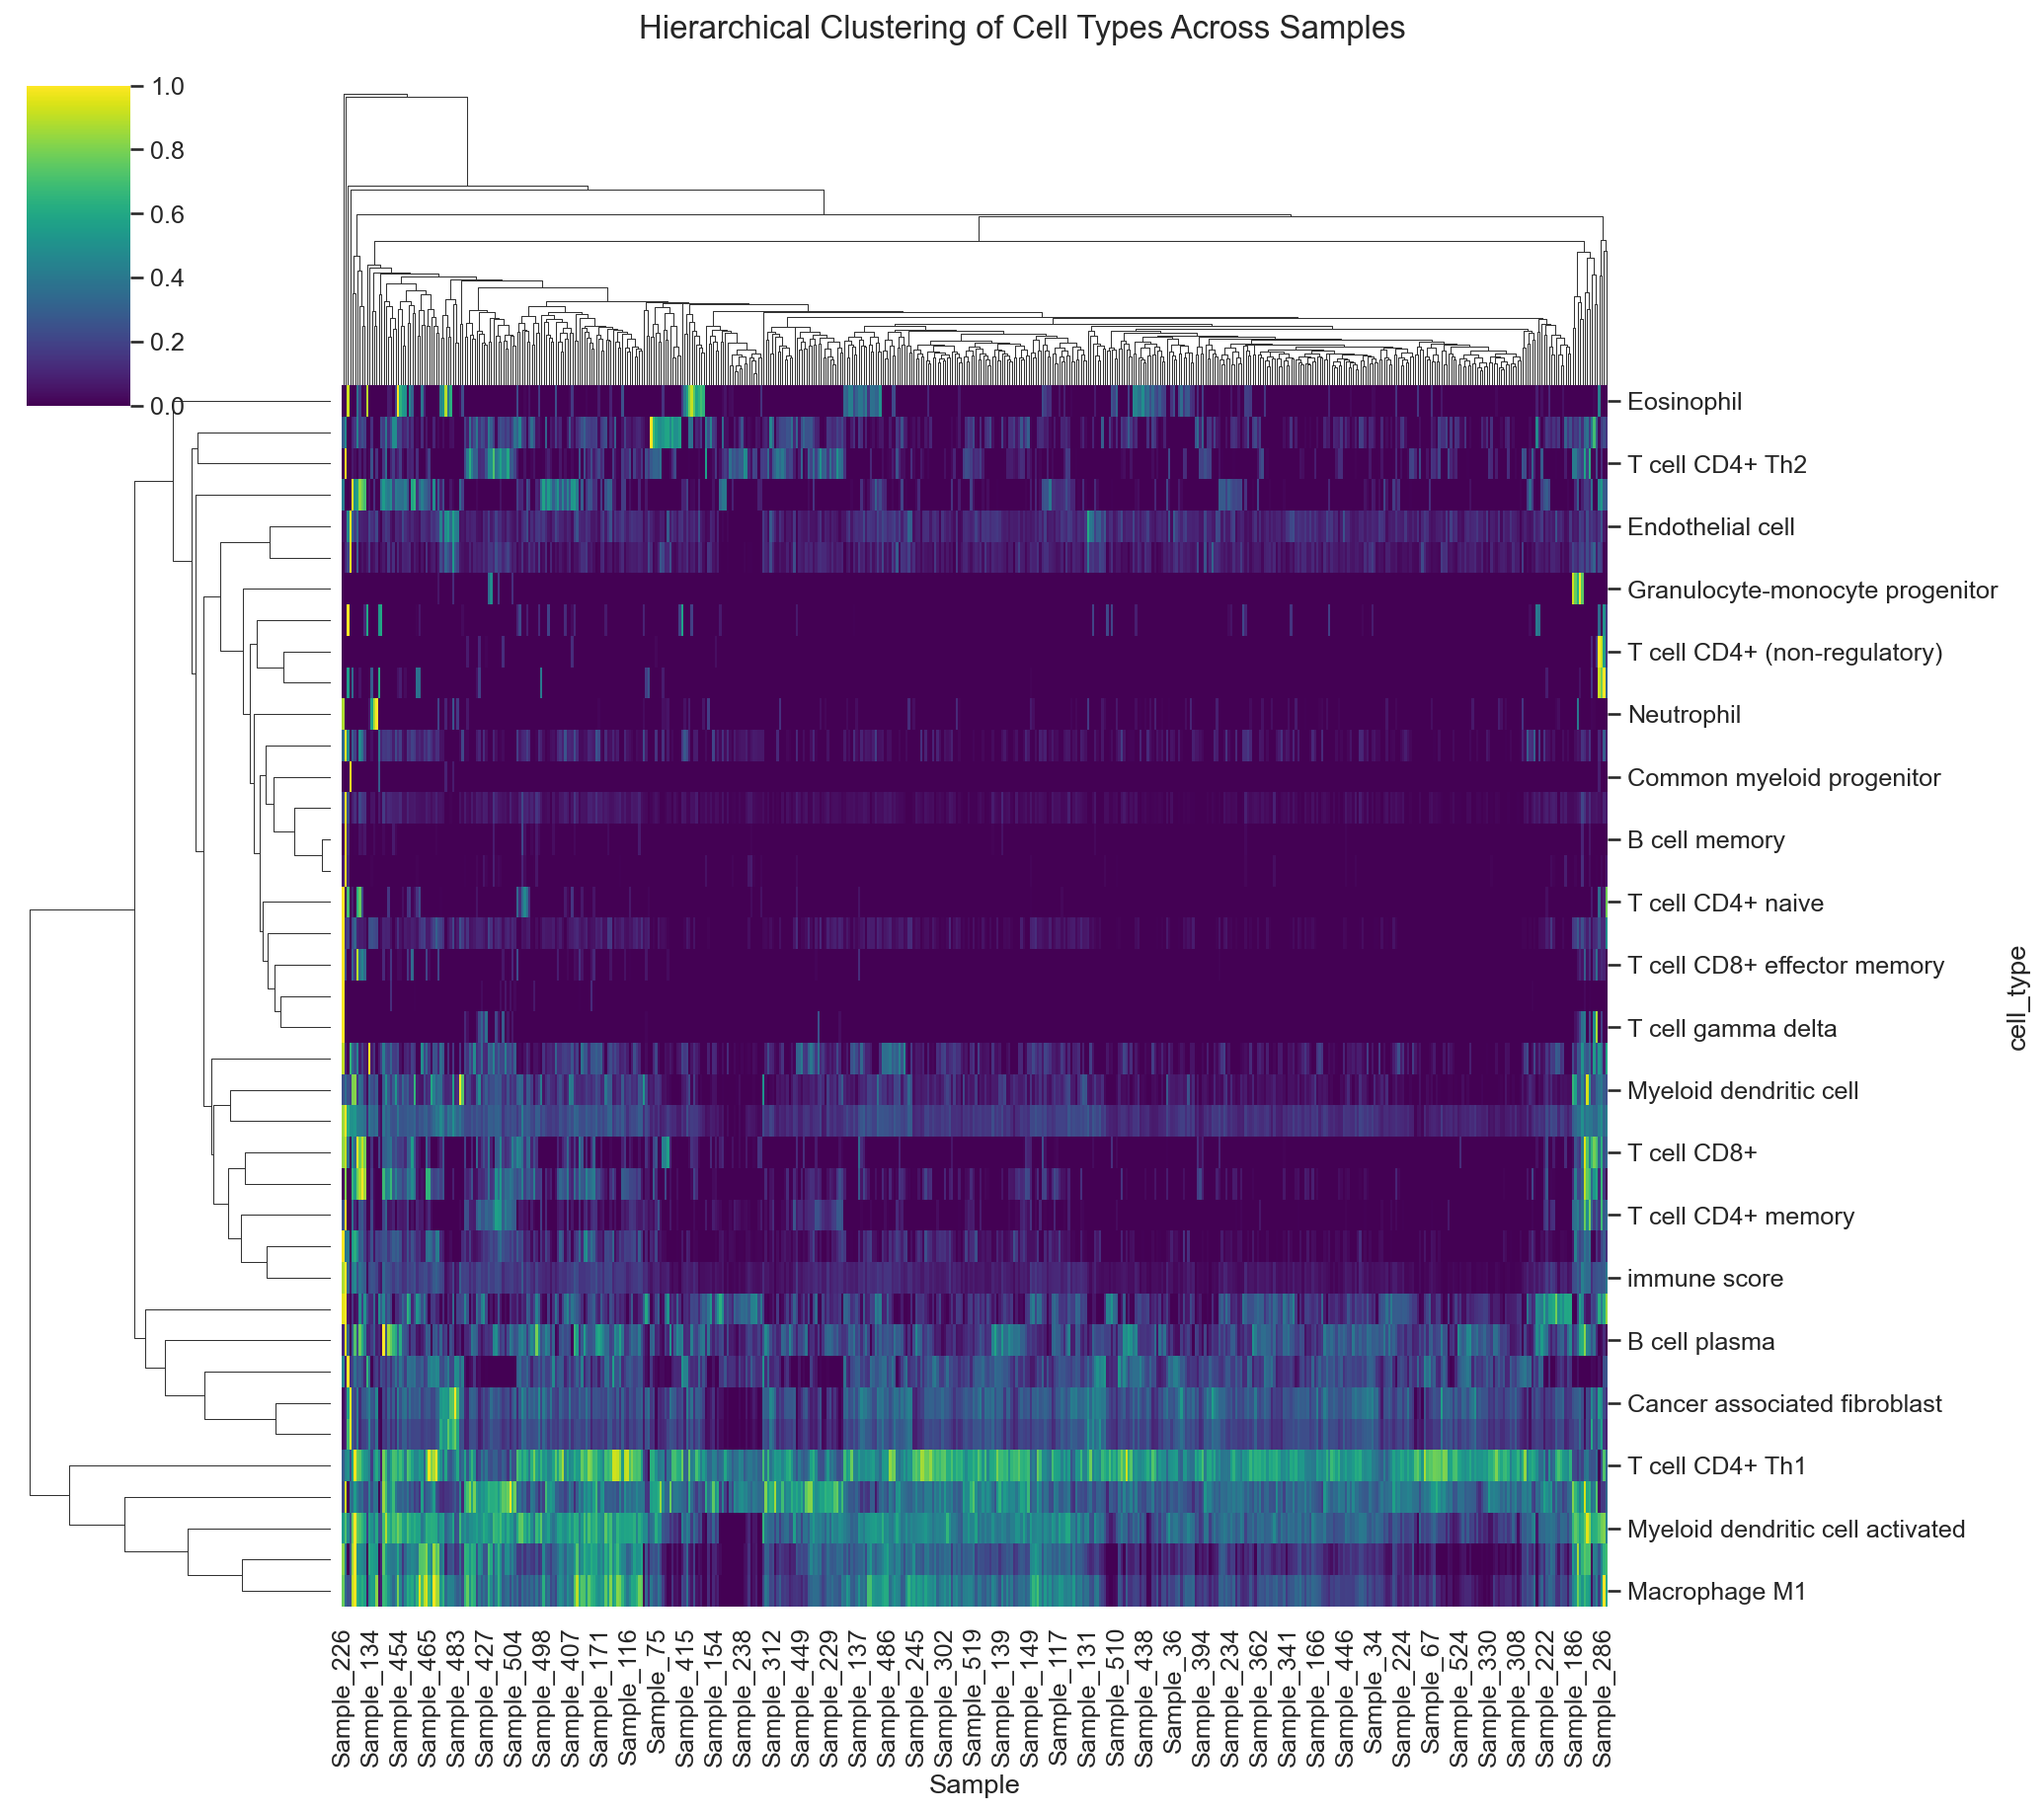

In [28]:
sns.clustermap(df.T, figsize=(14, 12), cmap="viridis", standard_scale=0)
plt.suptitle("Hierarchical Clustering of Cell Types Across Samples", y=1.02)
plt.show()


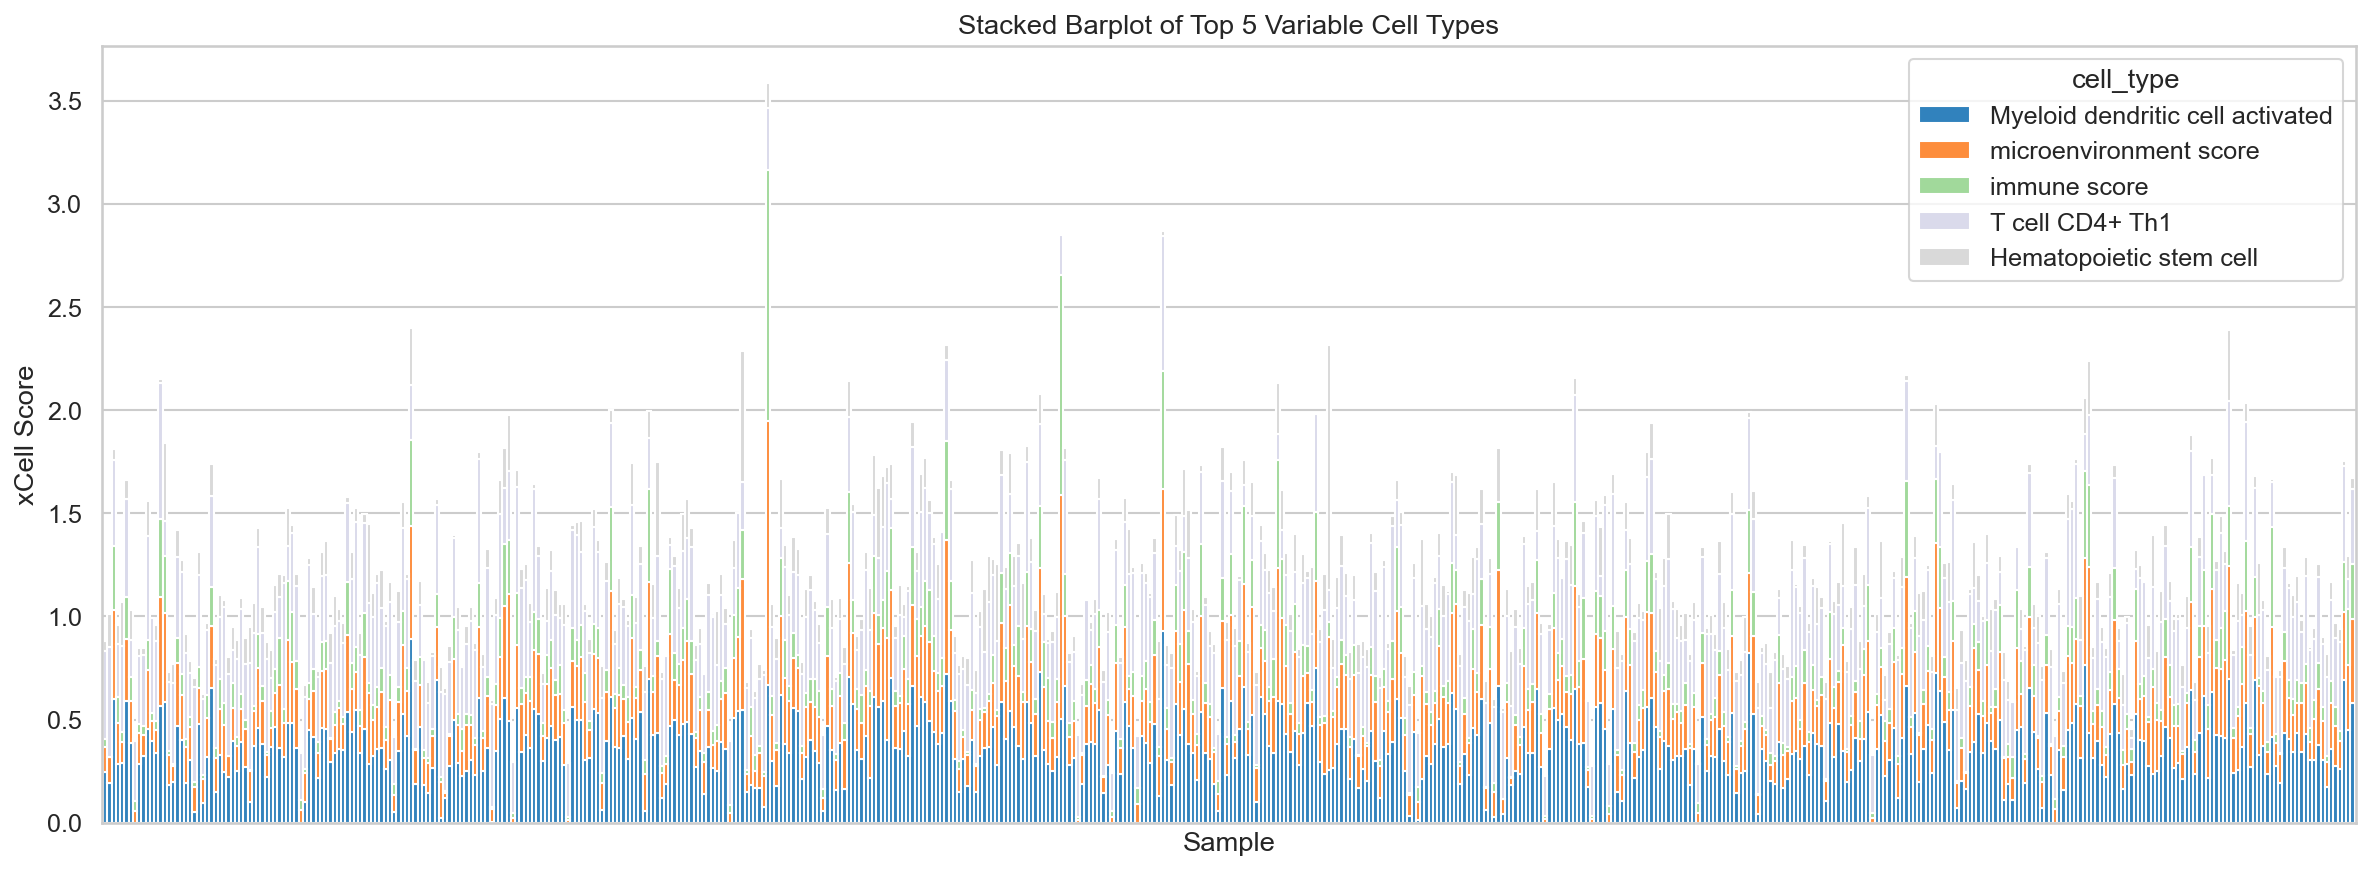

In [30]:
top5 = df.var().sort_values(ascending=False).head(5).index
df_stacked = df[top5]

df_stacked.plot(kind="bar", stacked=True, figsize=(16, 6), colormap="tab20c", width=1)
plt.title("Stacked Barplot of Top 5 Variable Cell Types")
plt.ylabel("xCell Score")
plt.xticks([], [])  # Hide sample labels (too many)
plt.tight_layout()
plt.show()


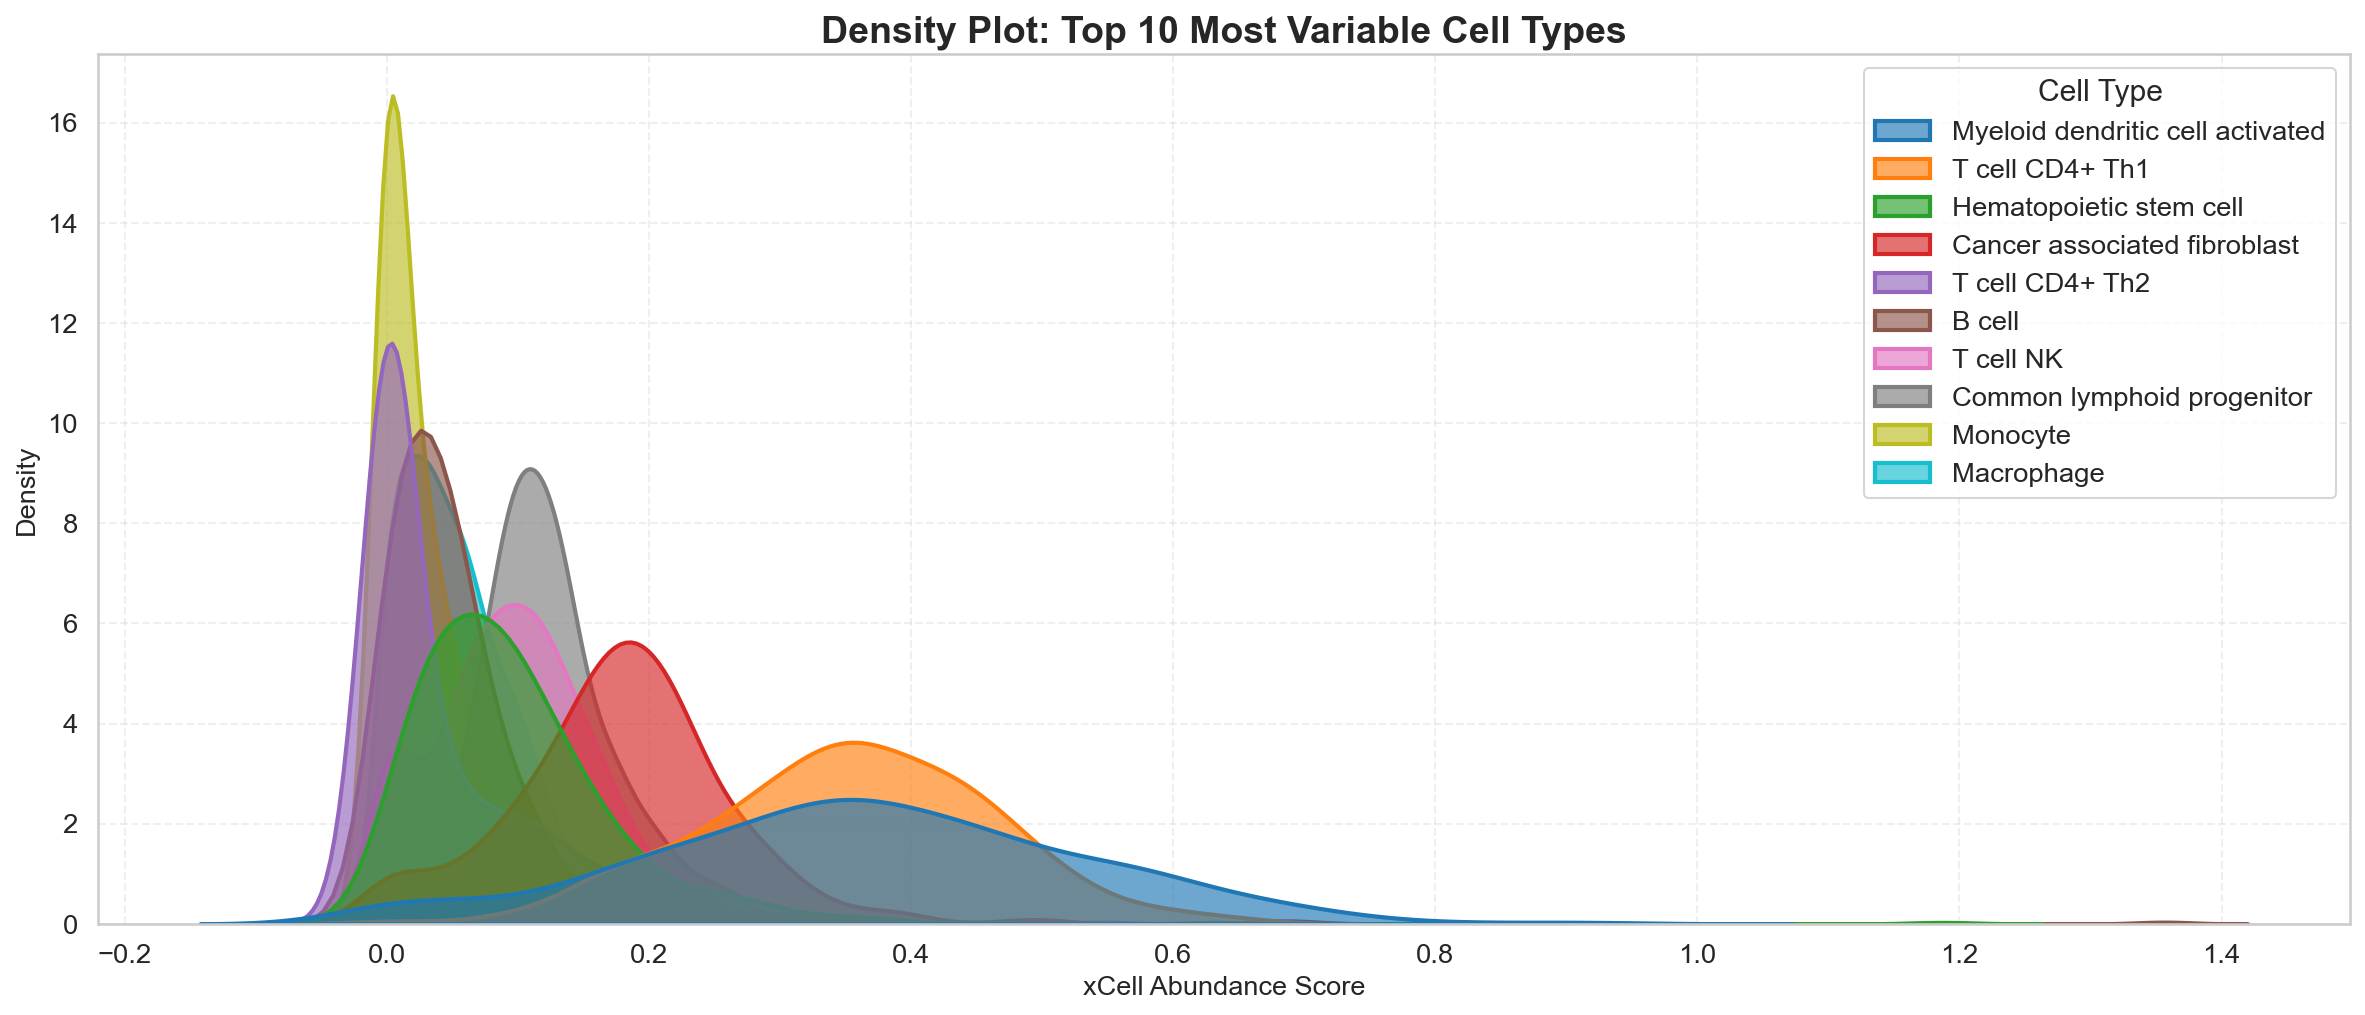

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude last 3 cell types
df_trimmed = df.iloc[:, :-3]

# Get top 10 most variable cell types
top10 = df_trimmed.var().sort_values(ascending=False).head(10).index
df_top10 = df_trimmed[top10].melt(var_name="Cell Type", value_name="Abundance")

# Seaborn style
sns.set(style="whitegrid", font_scale=1.2, rc={"figure.dpi": 150})

# Plot
plt.figure(figsize=(16, 7))
palette = sns.color_palette("tab10", n_colors=10)

sns.kdeplot(
    data=df_top10,
    x="Abundance",
    hue="Cell Type",
    fill=True,
    palette=palette,
    linewidth=2,
    alpha=0.65,
    common_norm=False,
    legend=True  # Ensures legend is created
)

# Formatting
plt.title("Density Plot: Top 10 Most Variable Cell Types", fontsize=18, weight="bold")
plt.xlabel("xCell Abundance Score", fontsize=13)
plt.ylabel("Density", fontsize=13)
plt.grid(True, linestyle="--", alpha=0.3)

# Ensure layout and legend fit
plt.tight_layout()
plt.show()


C:\Users\shrav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\shrav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


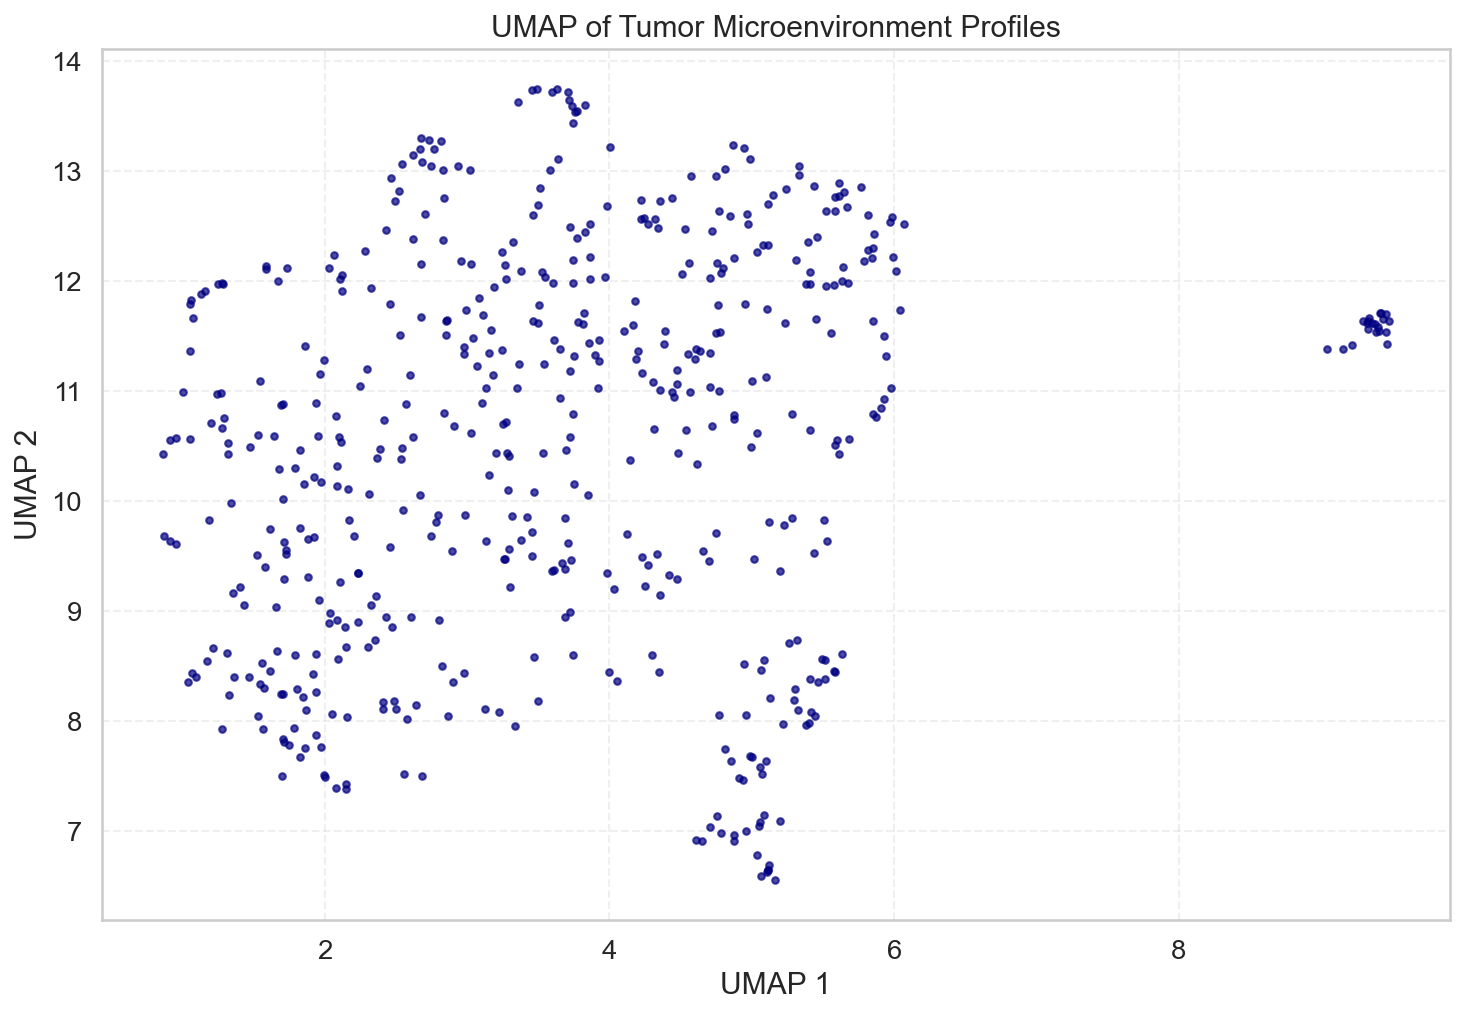

In [38]:
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap

X_scaled = StandardScaler().fit_transform(df)

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(embedding[:, 0], embedding[:, 1], s=10, alpha=0.7, c='navy')
plt.title("UMAP of Tumor Microenvironment Profiles")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\shrav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\shrav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


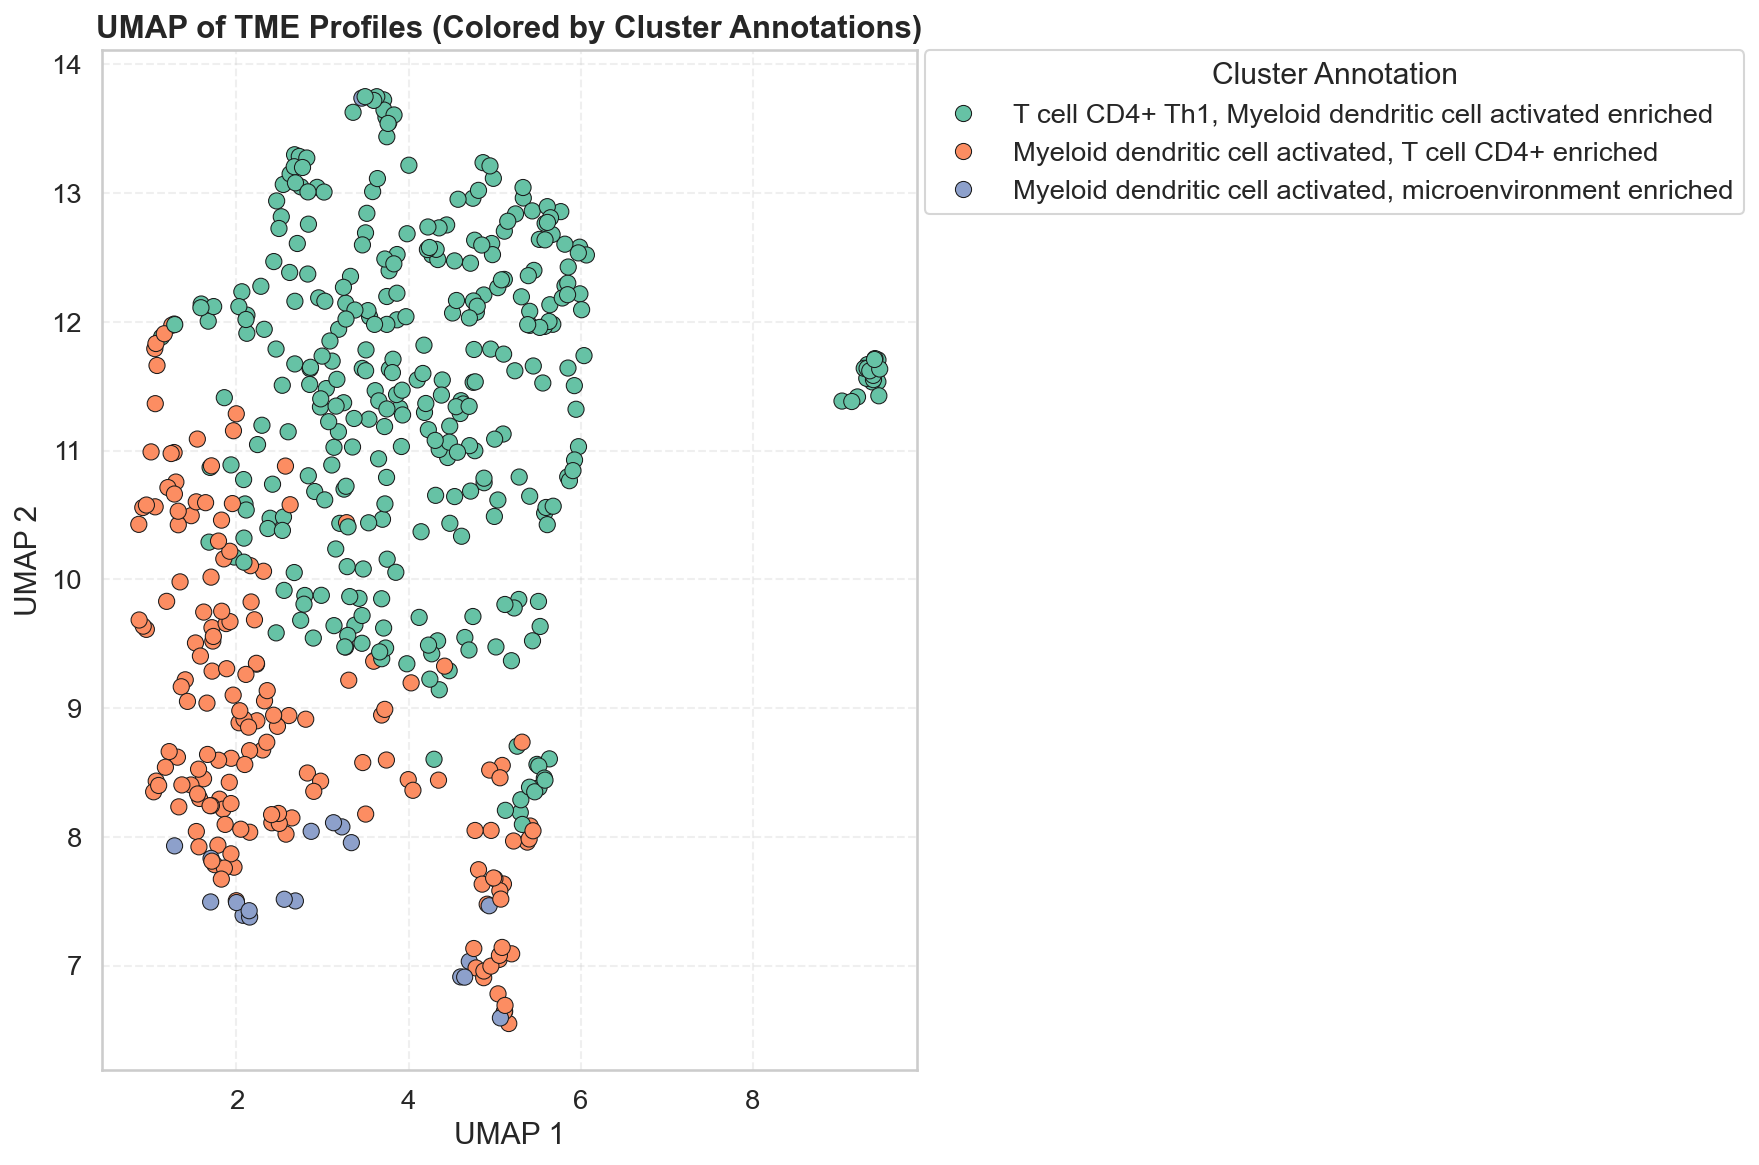

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import umap.umap_ as umap

# Your descriptive cluster annotations as a dictionary or Series
cluster_annotation_map = {
    0: "Myeloid dendritic cell activated, microenvironment enriched",
    1: "T cell CD4+ Th1, Myeloid dendritic cell activated enriched",
    2: "Myeloid dendritic cell activated, T cell CD4+ enriched"
}

# Standardize xCell data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# KMeans clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to DataFrame
df_clustered = df.copy()
df_clustered["Cluster"] = clusters

# Map clusters to descriptive labels
df_clustered["Cluster_Annotation"] = df_clustered["Cluster"].map(cluster_annotation_map)

# UMAP embedding
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding = reducer.fit_transform(X_scaled)

# Convert to DataFrame for plotting
umap_df = pd.DataFrame(embedding, columns=["UMAP1", "UMAP2"])
umap_df["Cluster"] = clusters
umap_df["Cluster_Annotation"] = umap_df["Cluster"].map(cluster_annotation_map)

# Plot with annotated cluster labels
sns.set(style="whitegrid", font_scale=1.2, rc={"figure.dpi": 150})
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=umap_df,
    x="UMAP1", y="UMAP2",
    hue="Cluster_Annotation",  # Use descriptive labels here
    palette="Set2",
    s=60,
    edgecolor="k",
    linewidth=0.5
)
plt.title("UMAP of TME Profiles (Colored by Cluster Annotations)", fontsize=15, weight="bold")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title="Cluster Annotation", bbox_to_anchor=(1.01, 1), loc="upper left", borderaxespad=0)
plt.tight_layout()
plt.savefig("TME_UMAP_Cluster_Annotations.png", dpi=300)
plt.show()


In [49]:
# Use df_clustered (with Cluster labels)
df_features = df_clustered.drop(columns=["Cluster"])

# Compute mean xCell scores per cluster
cluster_profiles = df_features.groupby(df_clustered["Cluster"]).mean().T


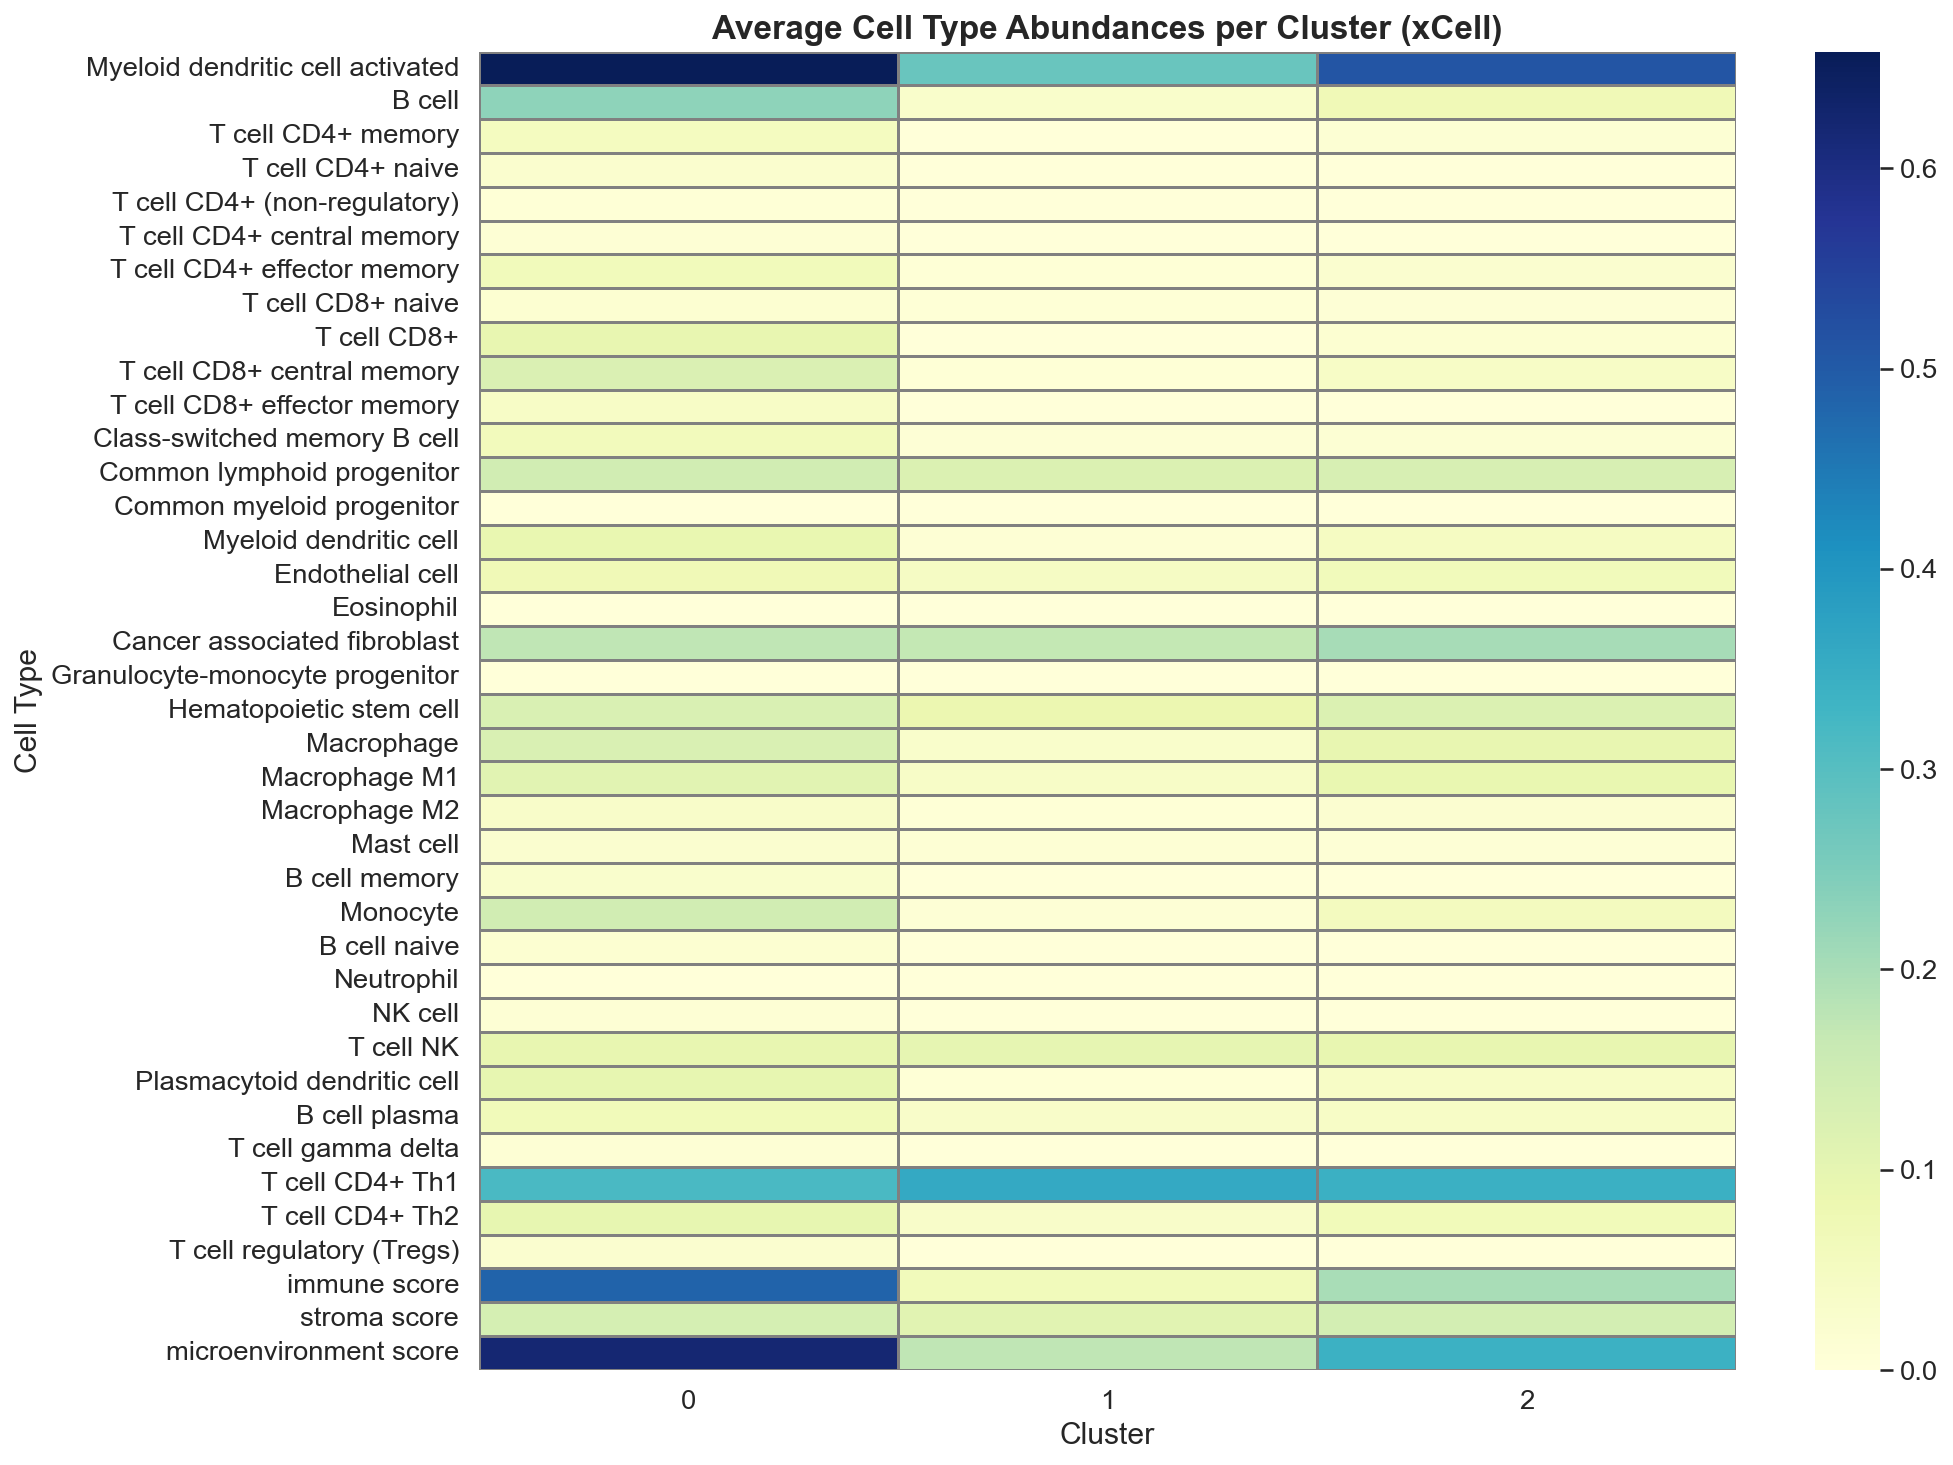

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(cluster_profiles, cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Average Cell Type Abundances per Cluster (xCell)", fontsize=16, weight="bold")
plt.xlabel("Cluster")
plt.ylabel("Cell Type")
plt.tight_layout()
plt.savefig("TME_Cluster_Annotation_Heatmap.png", dpi=300)
plt.show()


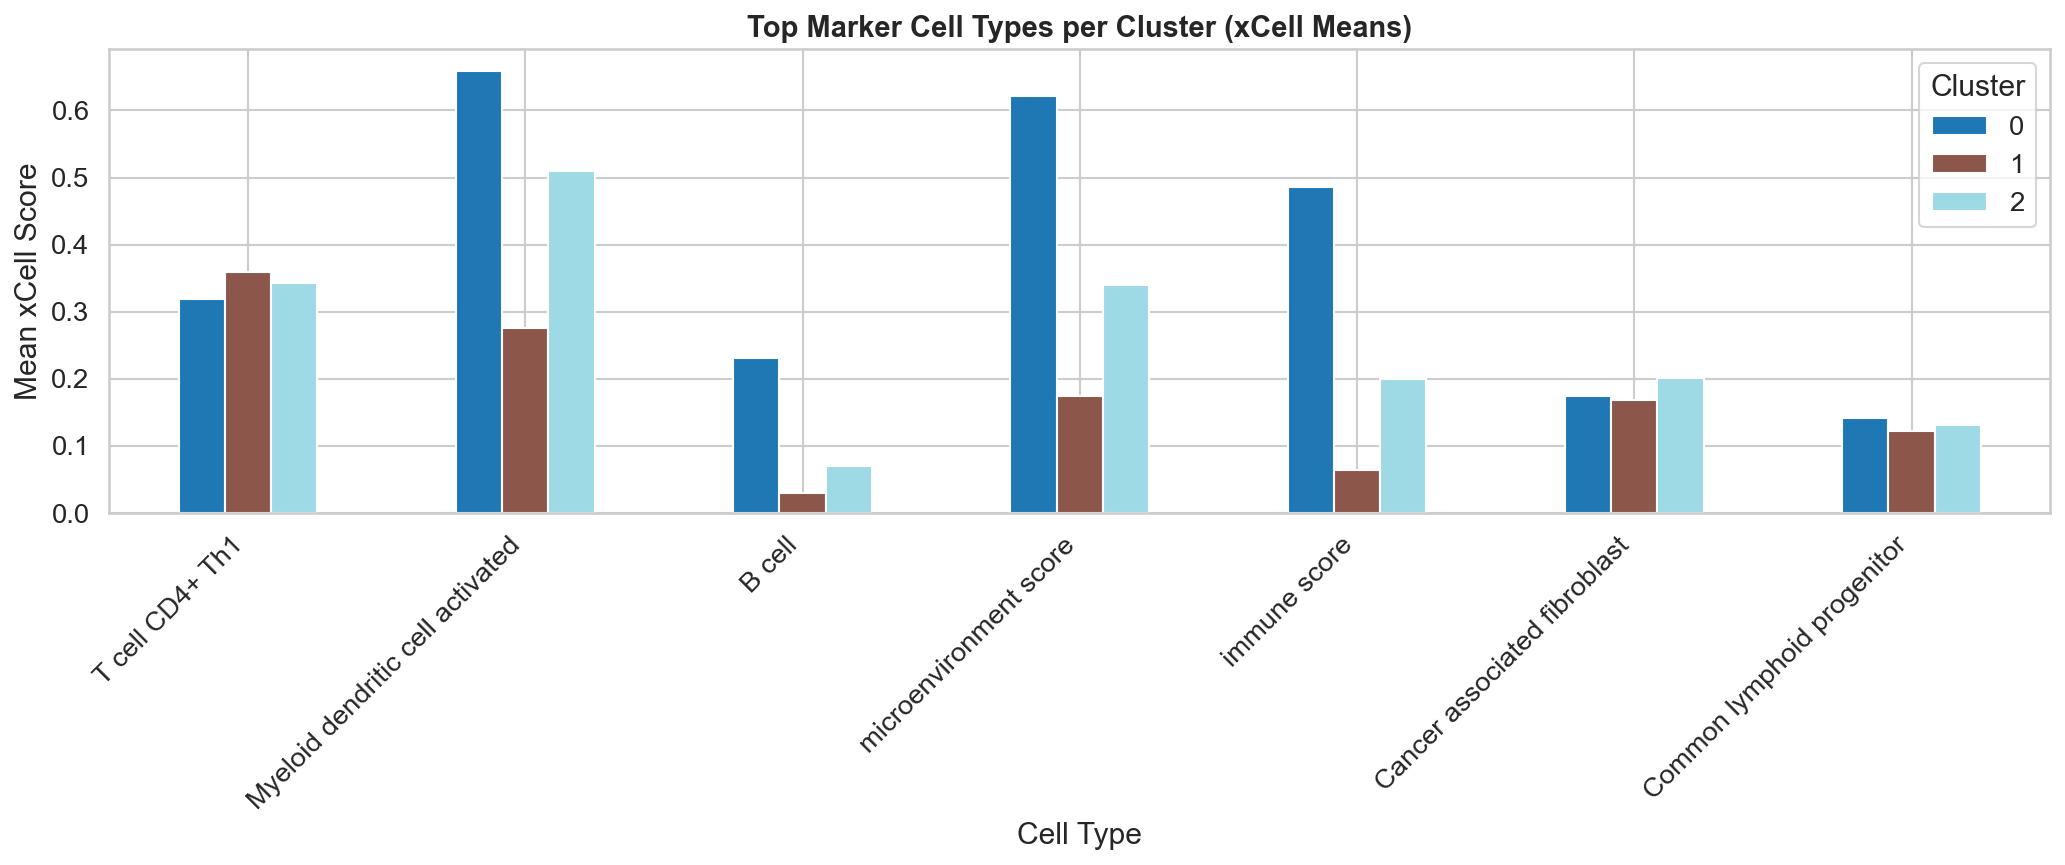

In [53]:
# Get top 5 cell types per cluster
top_markers = cluster_profiles.apply(lambda col: col.sort_values(ascending=False).head(5).index.tolist())

# Flatten the list of lists into a set of unique cell types
top_unique = set(cell for sublist in top_markers.values for cell in sublist)

# Subset cluster_profiles to just those top marker cell types (convert set to list!)
top_df = cluster_profiles.loc[list(top_unique)]

# Barplot
top_df.plot(kind='bar', figsize=(14, 6), colormap='tab20')
plt.title("Top Marker Cell Types per Cluster (xCell Means)", fontsize=14, weight="bold")
plt.ylabel("Mean xCell Score")
plt.xlabel("Cell Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("TME_Top_Celltypes_Per_Cluster.png", dpi=300)
plt.show()


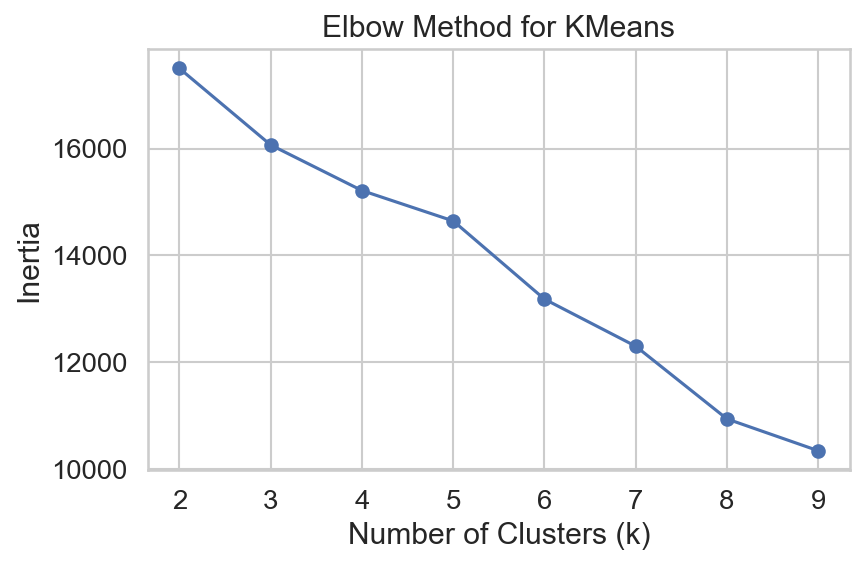

In [43]:
inertias = []
k_range = range(2, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:
cluster_annotations = top_markers.apply(lambda x: ', '.join(x), axis=0)
print(cluster_annotations)


Cluster
0    Myeloid dendritic cell activated, microenviron...
1    T cell CD4+ Th1, Myeloid dendritic cell activa...
2    Myeloid dendritic cell activated, T cell CD4+ ...
dtype: object


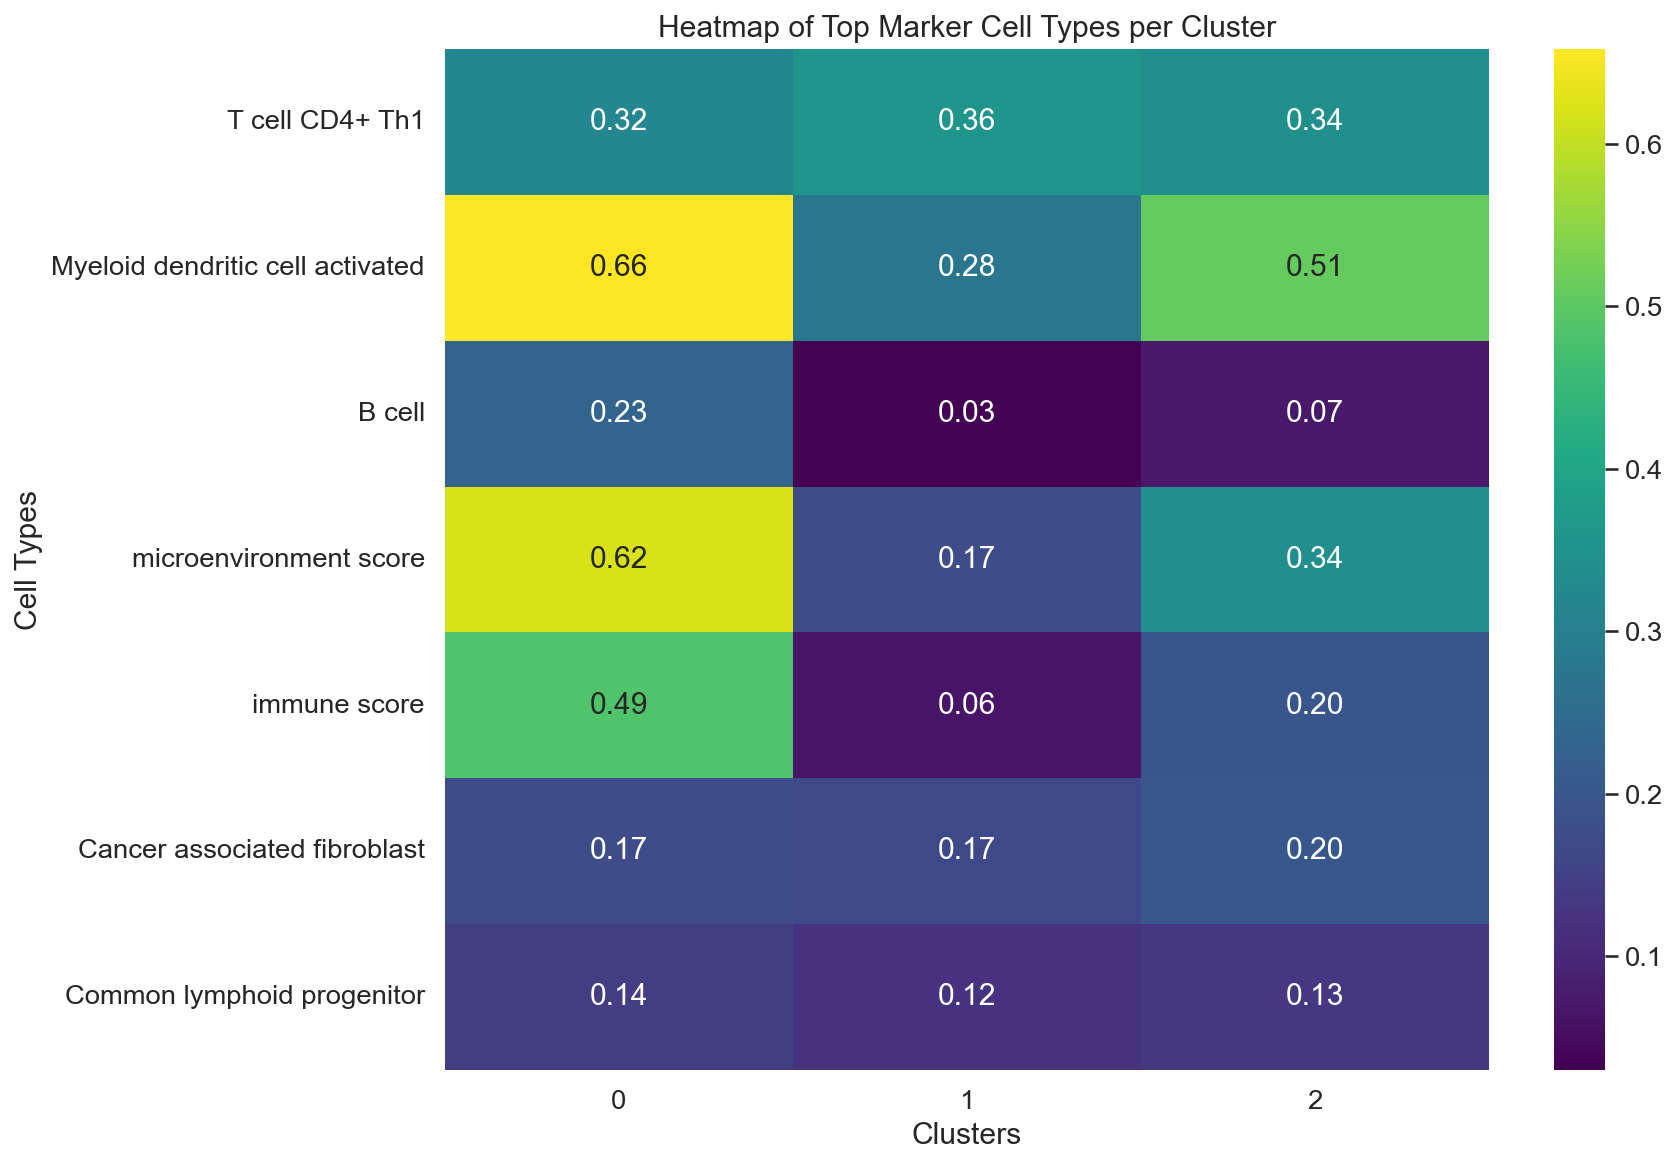

In [55]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(top_df, cmap='viridis', annot=True, fmt=".2f")
plt.title("Heatmap of Top Marker Cell Types per Cluster")
plt.xlabel("Clusters")
plt.ylabel("Cell Types")
plt.tight_layout()
plt.savefig("TME_Heatmap_Top_Markers.png", dpi=300)
plt.show()


C:\Users\shrav\AppData\Local\Temp\ipykernel_5332\1921868430.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Mean xCell Score", y="Cell Type", data=df, palette="viridis")


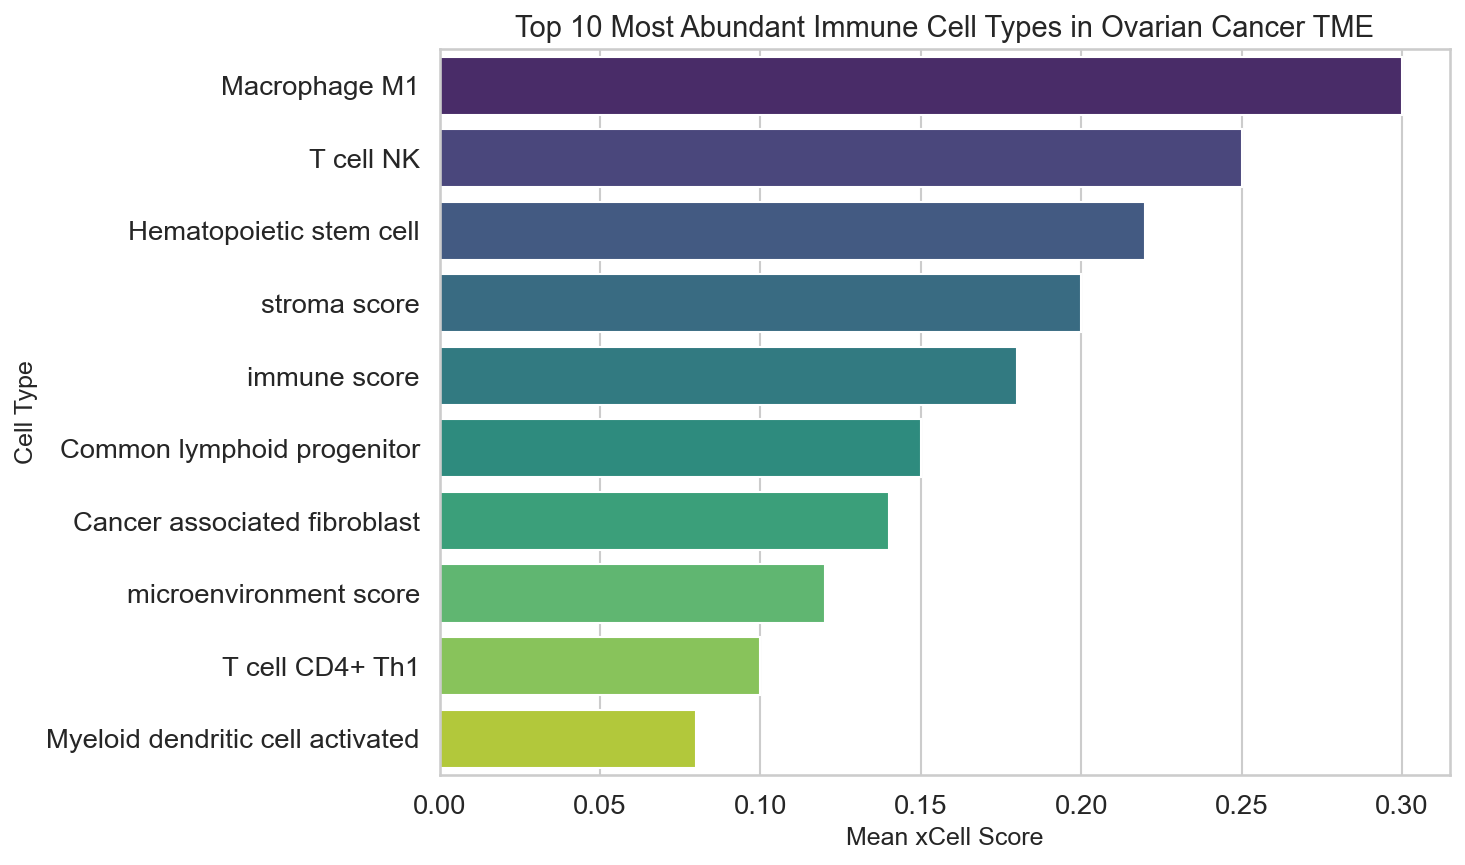

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Mock data (replace with your xCell scores)
data = {
    "Cell Type": [
        "Macrophage M1", "T cell NK", "Hematopoietic stem cell",
        "stroma score", "immune score", "Common lymphoid progenitor",
        "Cancer associated fibroblast", "microenvironment score",
        "T cell CD4+ Th1", "Myeloid dendritic cell activated"
    ],
    "Mean xCell Score": [0.30, 0.25, 0.22, 0.20, 0.18, 0.15, 0.14, 0.12, 0.10, 0.08]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Mean xCell Score", y="Cell Type", data=df, palette="viridis")
plt.title("Top 10 Most Abundant Immune Cell Types in Ovarian Cancer TME", fontsize=14)
plt.xlabel("Mean xCell Score", fontsize=12)
plt.ylabel("Cell Type", fontsize=12)
plt.tight_layout()
plt.savefig("top10_cells.png", dpi=300, bbox_inches="tight")
plt.show()